In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm

In [7]:
# 使用糖尿病数据
def load_data():
    diabetes = datasets.load_diabetes()
    x_train = diabetes.data
    y_train = diabetes.target
    return cross_validation.train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [8]:
def test_LinearSVR(*data):
    x_train, x_test, y_train, y_test = data
    svr = svm.LinearSVR()
    svr.fit(x_train,y_train)
    print('Coefficients:{0}, intercept {1}'.format(svr.coef_, svr.intercept_))
    print('Score: {0}'.format(svr.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_SVR(x_train, x_test, y_train, y_test )

Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [99.]
Score: -0.5627288485339224


In [9]:
# 损失函数对结果的影响
def test_LinearSVR_loss(*data):
    x_train, x_test, y_train, y_test = data
    losses = ('epsilon_insensitive','squared_epsilon_insensitive')
    for loss in losses:
        svr = svm.LinearSVR(loss=loss)
        svr.fit(x_train,y_train)
        print(loss)
        print('Coefficients:{0}, intercept {1}'.format(svr.coef_, svr.intercept_))
        print('Score: {0}'.format(svr.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_LinearSVR_loss(x_train, x_test, y_train, y_test )

epsilon_insensitive
Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [99.]
Score: -0.5627288485339224
squared_epsilon_insensitive
Coefficients:[   7.05570052 -103.32541064  395.67832795  221.76252727  -11.07925557
  -63.55608229 -176.67700174  117.56269956  322.63822262   95.61717465], intercept [152.37275664]
Score: 0.37814494951934907


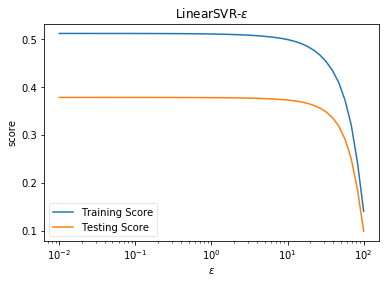

In [11]:
# epsilon的影响
def test_LinearSVR_epsilon(*data):
    train_x,test_x, train_y, test_y = data
    epsilons = np.logspace(-2,2)
    train_score = []
    test_score = []
    for epsilon in epsilons:
        svc = svm.LinearSVR(epsilon=epsilon, loss='squared_epsilon_insensitive')
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(epsilons,train_score,label='Training Score')
    ax.plot(epsilons,test_score, label='Testing Score')
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel('score')
    ax.set_title('LinearSVR-$\epsilon$')
    ax.set_xscale('log')
    ax.legend(loc='best',framealpha=0.5)
    plt.show()
    
x_train, x_test, y_train, y_test = load_data()
test_LinearSVR_epsilon(x_train, x_test, y_train, y_test )

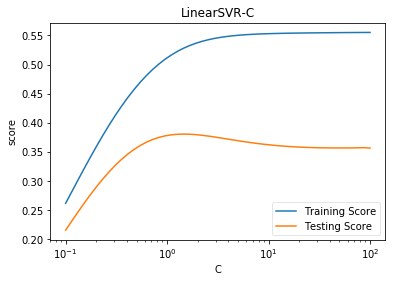

In [12]:
# 惩罚项系数的影响
def test_LinearSVR_C(*data):
    train_x,test_x, train_y, test_y = data
    Cs = np.logspace(-1,2)
    train_score = []
    test_score = []
    for C in Cs:
        svr = svm.LinearSVR(C=C,epsilon=0.1,loss='squared_epsilon_insensitive')
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Cs,train_score,label='Training Score')
    ax.plot(Cs,test_score, label='Testing Score')
    ax.set_xlabel(r'C')
    ax.set_ylabel('score')
    ax.set_title('LinearSVR-C')
    ax.set_xscale('log')
    ax.legend(loc='best',framealpha=0.5)
    plt.show()
    
x_train, x_test, y_train, y_test = load_data()
test_LinearSVR_C(x_train, x_test, y_train, y_test )